In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle


# **Import Ipl Dataset**

In [2]:
ipl_data=pd.read_csv('../input/ipl-dataset/ipl.csv')
ipl_data.shape

(76014, 15)

In [3]:
ipl_data.head(5)

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


# Data Cleaning Process

In [4]:
#removing unwanted columns
column_delete=['mid','venue','batsman','bowler','striker','non-striker']
ipl_data.drop(labels=column_delete,axis=1,inplace=True)

In [5]:
ipl_data.head(5)

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [6]:
[ipl_data['bat_team'].unique()]

[array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
        'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
        'Royal Challengers Bangalore', 'Delhi Daredevils',
        'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
        'Rising Pune Supergiants', 'Gujarat Lions',
        'Rising Pune Supergiant'], dtype=object)]

In [7]:
current_team=['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
        'Mumbai Indians', 'Kings XI Punjab',
        'Royal Challengers Bangalore', 'Delhi Daredevils','Sunrisers Hyderabad']


In [8]:
ipl_data=ipl_data[(ipl_data['bat_team'].isin(current_team))&(ipl_data['bowl_team'].isin(current_team))]

In [9]:
ipl_data.shape

(53811, 9)

In [10]:
#Removing First 6 over i.e Powerplay to that we have atleast 6 over data to predict
ipl_data=ipl_data[ipl_data['overs']>=6.0]

In [11]:
ipl_data.head(5)

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
38,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,62,1,6.1,55,1,222
39,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,63,1,6.2,52,1,222
40,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,64,1,6.3,47,1,222
41,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,66,1,6.4,45,1,222
42,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,67,1,6.5,46,1,222


In [12]:
#Convert Data string to datetime object
from datetime import datetime
ipl_data['date']=ipl_data['date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))


In [13]:
#Data Preprocessing : One Hot Encoding
encoded_ipl=pd.get_dummies(data=ipl_data,columns=['bat_team','bowl_team'])

In [14]:
encoded_ipl.head(5)

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
38,2008-04-18,62,1,6.1,55,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
39,2008-04-18,63,1,6.2,52,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
40,2008-04-18,64,1,6.3,47,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
41,2008-04-18,66,1,6.4,45,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
42,2008-04-18,67,1,6.5,46,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [15]:
#Rearranging Dataset
encoded_ipl.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

In [16]:
encoded_ipl=encoded_ipl[['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
        'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad','total']]

# Train Test Split

In [17]:
x_train=encoded_ipl.drop(labels='total',axis=1)[encoded_ipl['date'].dt.year<=2016]
x_test=encoded_ipl.drop(labels='total',axis=1)[encoded_ipl['date'].dt.year>2016]


In [18]:
y_train=encoded_ipl[encoded_ipl['date'].dt.year<=2016]['total'].values
y_test=encoded_ipl[encoded_ipl['date'].dt.year>2016]['total'].values

In [19]:
#remove date column
x_train.drop(labels='date',axis=True,inplace=True)
x_test.drop(labels='date',axis=True,inplace=True)

# Model Building
 

In [20]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [21]:
y_pred=lr.predict(x_test)

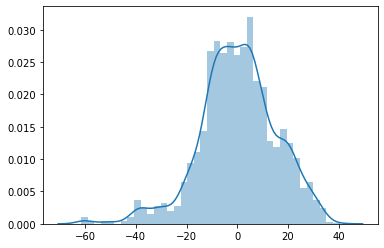

In [22]:
import seaborn as sns
sns.distplot(y_test-y_pred)


In [25]:
from sklearn import metrics
print('Mean Absolute Error :',(metrics.mean_absolute_error(y_test,y_pred)))

SyntaxError: unexpected EOF while parsing (<ipython-input-25-f4a750128a80>, line 2)